## Comma Team Final Project Code

In this file, we go through all of the steps to undertake our investigation into our dataset. We first clean up data, select features, perform features engineering, then perform an investigative analysis using different classification models.

#### Preparations

First, let's import the necessary libraries and load the data files for our project.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# CVA.csv should be in DSCI 303/; if your files are in a different directory
# on your Google Drive, you will need to change the path below accordingly
DATADIR = '/content/drive/My Drive/DSCI 303/Final Project/'

Mounted at /content/drive


In [3]:
# Load comma.csv and display the data head
df = pd.read_csv(DATADIR + "comma.csv")
df.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# rename columns
df.columns = ['respondent_id', 'use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 
              'considered_data_plural', 'care_data_plural', 'care_grammar', 'gender', 'age', 'household_income', 'education', 'location']

# change feature values to be more convenient
df.loc[df['use_oxford_comma'] == "It's important for a person to be honest, kind, and loyal.", 'use_oxford_comma'] = 'Yes'
df.loc[df['use_oxford_comma'] == "It's important for a person to be honest, kind and loyal.", 'use_oxford_comma'] = 'No'

df.loc[df['use_data_plural'] == "Some experts say it's important to drink milk, but the data is inconclusive.", 'use_data_plural'] = 'No'
df.loc[df['use_data_plural'] == "Some experts say it's important to drink milk, but the data are inconclusive.", 'use_data_plural'] = 'Yes'

df.loc[df['care_grammar'] == "Neither important nor unimportant (neutral)", 'care_grammar'] = 'Neutral'

df['use_data_plural'].value_counts() # No: 865, Yes: 228
display(df)

,respondent_id,use_oxford_comma,heard_of_comma,care_for_comma,use_data_plural,considered_data_plural,care_data_plural,care_grammar,gender,age,household_income,education,location
0,3292953864,No,Yes,Some,No,No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,Yes,No,Not much,No,No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,Yes,Yes,Some,No,Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,Yes,Yes,Some,No,No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,No,No,Not much,No,No,Not much,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,3288387618,Yes,Yes,A lot,No,No,A lot,Very important,Female,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic
1125,3288387379,No,No,Some,No,No,Some,Very important,Female,30-44,"$50,000 - $99,999",Some college or Associate degree,Pacific
1126,3288382543,Yes,Yes,Some,No,No,Not much,Somewhat important,Female,30-44,"$50,000 - $99,999",Graduate degree,Middle Atlantic
1127,3288379152,No,Yes,A lot,No,Yes,Not much,Very important,Female,45-60,"$50,000 - $99,999",Graduate degree,East South Central


In [5]:
# Print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   respondent_id           1129 non-null   int64 
 1   use_oxford_comma        1129 non-null   object
 2   heard_of_comma          1099 non-null   object
 3   care_for_comma          1099 non-null   object
 4   use_data_plural         1093 non-null   object
 5   considered_data_plural  1091 non-null   object
 6   care_data_plural        1091 non-null   object
 7   care_grammar            1059 non-null   object
 8   gender                  1037 non-null   object
 9   age                     1037 non-null   object
 10  household_income        836 non-null    object
 11  education               1026 non-null   object
 12  location                1027 non-null   object
dtypes: int64(1), object(12)
memory usage: 114.8+ KB


We can see in this data, not every features column has complete entries, which means: we have MISSING DATA!

Firstly, we will remove any features that do not have enough data to make them worthwhile to include. (That ends up being none of them in our case)

In [6]:
# Remove columns with too many missing values

# Not going to remove any other than respondent_id since the feature ("household_income") that has 
# the most number of missing values has less than 30% NaN values

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.7]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

if df.shape == df2.shape:
   print('N/A')
print('\n')
df = df2
df = df.drop(columns='respondent_id')

print('The column "household_income" has the highest percentage of NaN values:', 
      1 - df['household_income'].count()/len(df), ', which is still less than 30%.')

List of dropped columns: N/A


The column "household_income" has the highest percentage of NaN values: 0.25952170062001767 , which is still less than 30%.


In [7]:
# Because we are missing ~25% of household_income and it is one of our output variables,
# we will drop any rows missing the value. This is also a good decision because we are
# unable to impute its missing values in a way that does not negatively impact training the model.
df = df.dropna(subset = ['household_income'])

#### Distribution Analysis

Now, let's look into the distribution of the annual household income feature

count                   836
unique                    5
top       $50,000 - $99,999
freq                    290
Name: household_income, dtype: object


/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


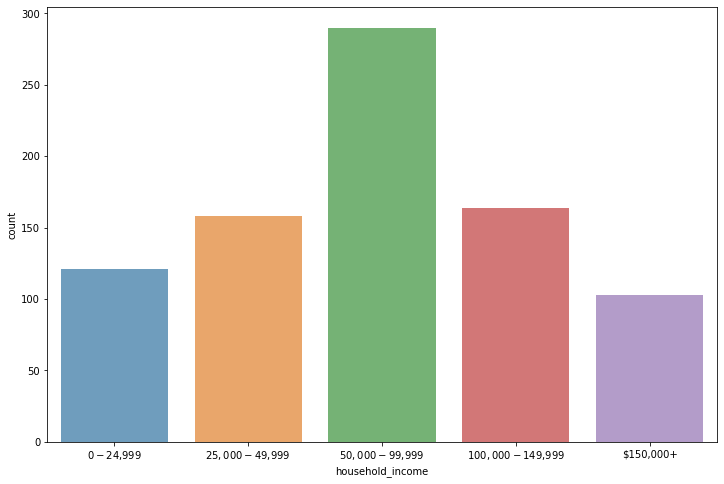

In [8]:
print(df['household_income'].describe())
plt.figure(figsize=(12, 8))

df['household_income'] = df['household_income'].astype('category')
df.household_income.cat.set_categories(
    new_categories = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'], ordered = True, inplace = True
)

sns.countplot(x='household_income', alpha=0.7, data=df)

Our dataset has not numeric features to examine, only categorical ones, which we examine later.

In [9]:
# Select the numerical featrues
df_num = df.select_dtypes(include = 'number')
df_num.head()
# NO NUMERIC FEATURES

""
0
1
5
6
7


As for the non-numeric features:

In [10]:
df_not_num = df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 11 non numerical features including:
['use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural', 'care_data_plural', 'care_grammar', 'gender', 'age', 'education', 'location']


In [11]:
df['care_for_comma']

# convert ordinal features to be ordered

df['use_oxford_comma'] = df['use_oxford_comma'].astype('category')
df.use_oxford_comma.cat.set_categories(
    new_categories = ['Yes', 'No'], ordered = True, inplace = True
)

df['heard_of_comma'] = df['heard_of_comma'].astype('category')
df.heard_of_comma.cat.set_categories(
    new_categories = ['Yes', 'No'], ordered = True, inplace = True
)

df['use_data_plural'] = df['use_data_plural'].astype('category')
df.use_data_plural.cat.set_categories(
    new_categories = ['Yes', 'No'], ordered = True, inplace = True
)

df['considered_data_plural'] = df['considered_data_plural'].astype('category')
df.considered_data_plural.cat.set_categories(
    new_categories = ['Yes', 'No'], ordered = True, inplace = True
)

df['care_for_comma'] = df['care_for_comma'].astype('category')
df.care_for_comma.cat.set_categories(
    new_categories = ['Not at all', 'Not much', 'Some', 'A lot'], ordered = True, inplace = True
)

df['care_data_plural'] = df['care_data_plural'].astype('category')
df.care_data_plural.cat.set_categories(
    new_categories = ['Not at all', 'Not much', 'Some', 'A lot'], ordered = True, inplace = True
)

df['care_grammar'] = df['care_grammar'].astype('category')
df.care_grammar.cat.set_categories(
    new_categories = ['Very unimportant', 'Somewhat unimportant', 'Neutral', 
                      'Somewhat important', 'Very important'], ordered = True, inplace = True
)

df['age'] = df['age'].astype('category')
df.age.cat.set_categories(
    new_categories = ['18-29', '30-44', '45-60', '> 60'], ordered = True, inplace = True
)

df['education'] = df['education'].astype('category')
df.education.cat.set_categories(
    new_categories = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 
                      'Bachelor degree', 'Graduate degree'], ordered = True, inplace = True
)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Looking at these features we can see that a lot of them are of the type `Object(O)`. In our data transformation notebook we could use [Pandas categorical functions](http://pandas.pydata.org/pandas-docs/stable/categorical.html) (equivalent to R's factor) to shape our data in a way that would be interpretable for our machine learning algorithm.

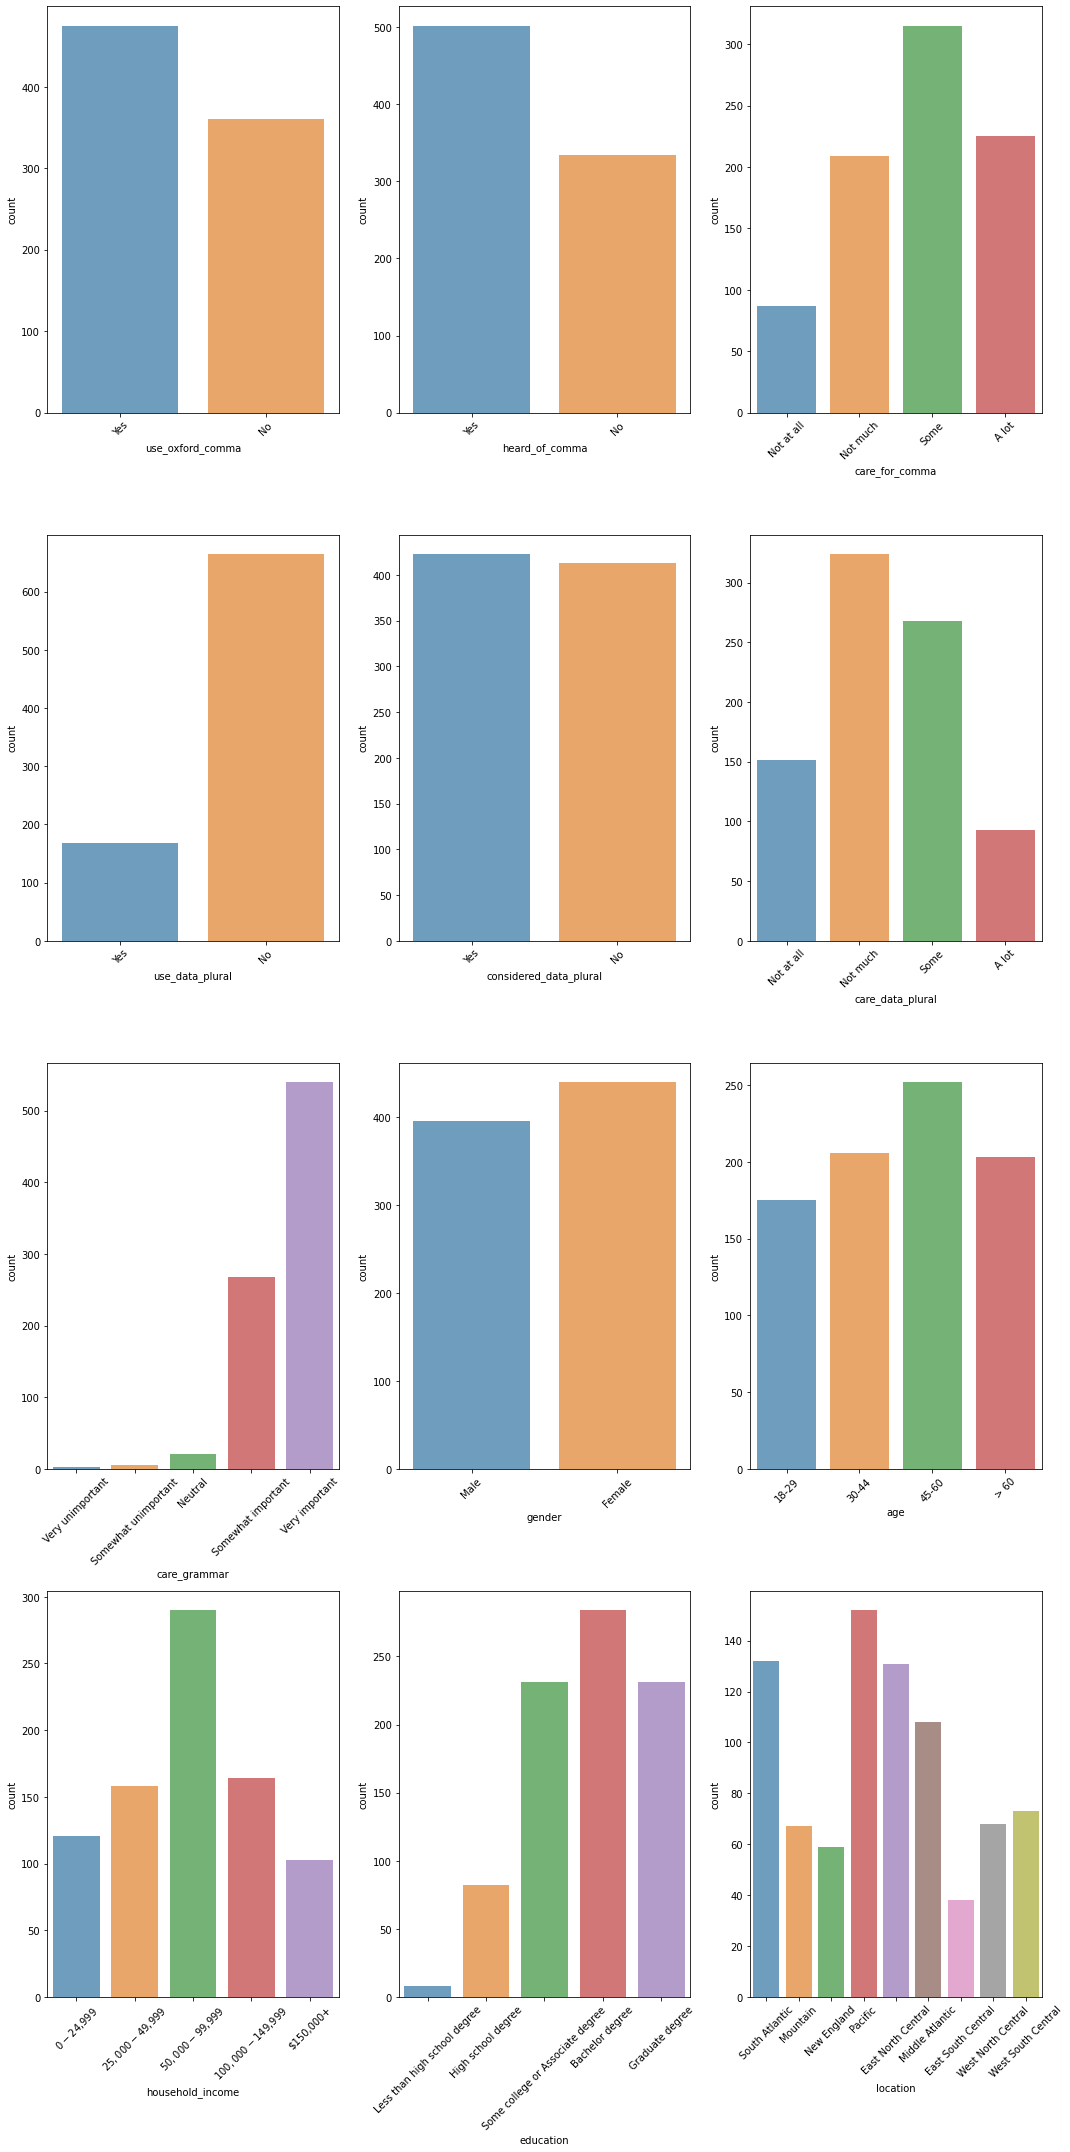

In [12]:
df_not_num = df

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.tick_params(axis='x', rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We can see that none of the features have a single dominant category with little variance. These features may all be relevant for our predictive model

#### Correlation (association) Analysis

Now we'll try to find which features are strongly associated with household_income. We'll store them in a list called golden_features_list.

In [13]:
from scipy.stats import chi2_contingency
# no numeric variables, so we will use the Chi-square test to find the correlation between categorical variables
chisqresults = []
for i in range(0,len(df.columns)):
  if df.columns[i] == 'household_income' or i == 0:
    continue
  CrosstabResult=pd.crosstab(index=df['household_income'],columns=df[df.columns[i]])
  ChiSqResult = chi2_contingency(CrosstabResult)
  chisqresults.append((i, df.columns[i], ChiSqResult[1]))

chisqresults.sort(key = lambda x: x[2])
#print(chisqresults)
golden_features_list = []
for i in range(len(chisqresults)):
  # we will use a significance level of .1 to determine if a feature is strongly correlated
  if chisqresults[i][2] < .1:
    golden_features_list.append((chisqresults[i][1], chisqresults[i][2]))

print("There is {} strongly correlated values with household_income:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with household_income:
[('age', 3.3551988931530774e-13), ('education', 9.25541052273737e-12), ('care_for_comma', 0.06978767870690113), ('care_data_plural', 0.08778689754429679)]


As we can see, based on the chi-squared test, there are 4 features with p-values less than .1, meaning we can reject the null hypothesis that they are not associated with household_income with a significance level of .1. Two of these are demographic features (age and education), which we do not plan to use in our model since the goal is to make predictions using only the grammar-related features. The other two associated features are whether the respondent cares about use of the oxford comma and whether they care about use of data as a singular vs. plural noun. This is promising, as it shows there is a potential tie between people being passionate about proper grammar with societal outcomes.

We can visualize the associations among columns using heatmap!

NOTE: Because we have only cateogorical variables, instead of visualizing correlations, we will visualize the Cramér's V score, which is a measure of association between two nominal variables.
https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

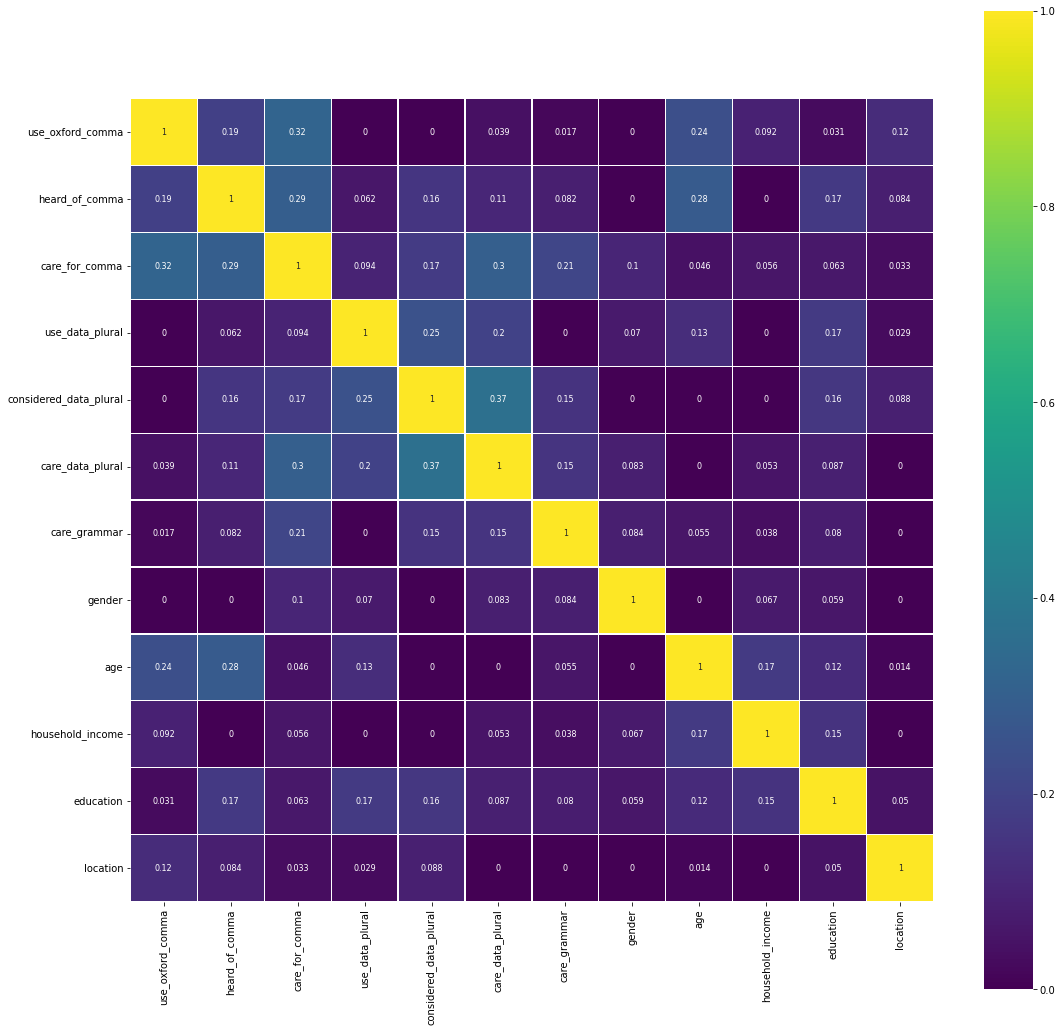

In [14]:
# source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_mtx = []
for i in range(0,len(df.columns)):
  cramers_mtx.append([0 for _ in range(len(df.columns))])

for i in range(0,len(df.columns)):
  for j in range(i,len(df.columns)):
    cramers_mtx[i][j] = cramers_v(df[df.columns[i]], df[df.columns[j]])
    cramers_mtx[j][i] = cramers_mtx[i][j]
    #print(cramers_v(df[df.columns[i]], df[df.columns[j]]))

cramers_mtx = pd.DataFrame(cramers_mtx, index=df.columns, columns=df.columns)

plt.figure(figsize=(18, 18))
# df_cramers = cramers_v(df, df)
sns.heatmap(cramers_mtx, 
            cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<ipython-input-15-5005d8553e19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grammar['income_binary'] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


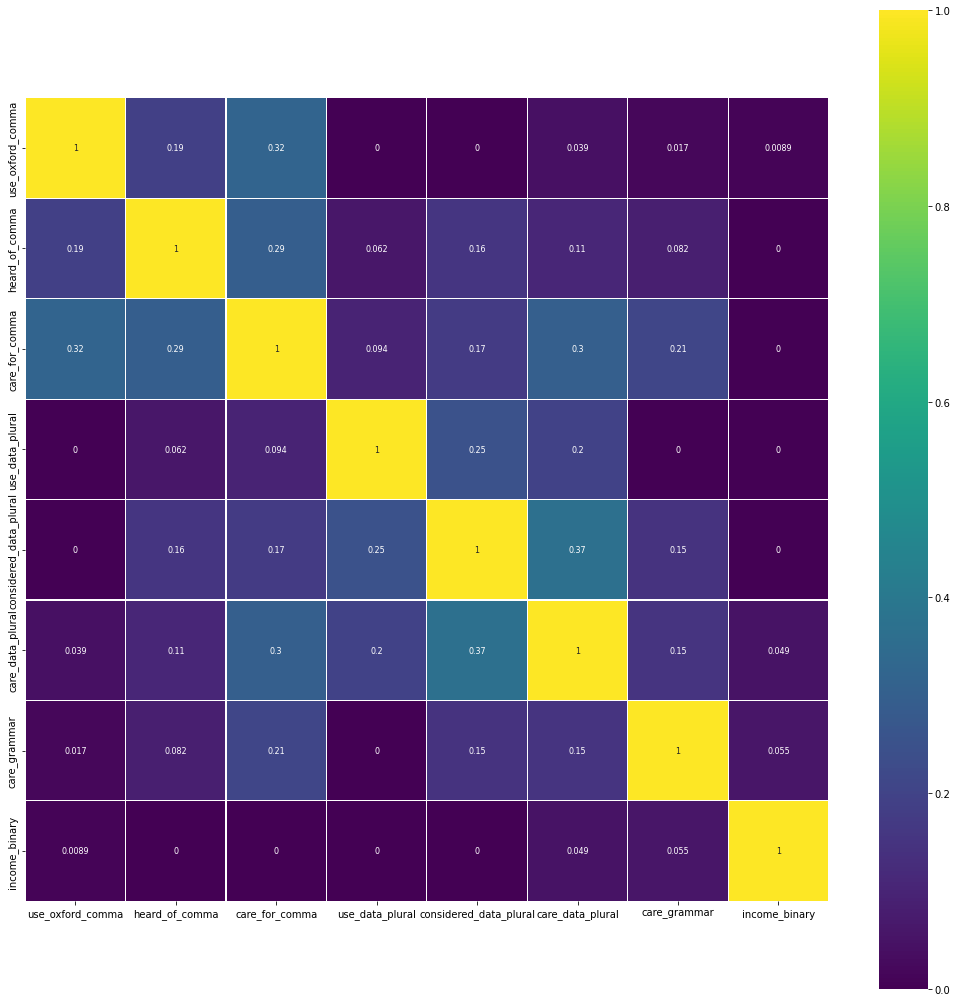

In [15]:
# heatmap for grammar-related features and income

df_grammar = df[['use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 
                                                        'considered_data_plural', 'care_data_plural', 'care_grammar', 'household_income']]
# NOTE: changes associations to make with the binary income variable, makes them smaller generally...
df_grammar['income_binary'] = np.nan
df_grammar.loc[df_grammar['household_income'] == "$0 - $24,999", 'income_binary'] = '$0 - $49,999'
df_grammar.loc[df_grammar['household_income'] == "$25,000 - $49,999", 'income_binary'] = '$0 - $49,999'
df_grammar.loc[df_grammar['household_income'] == "$50,000 - $99,999", 'income_binary'] = '$50,000+'
df_grammar.loc[df_grammar['household_income'] == "$100,000 - $149,999", 'income_binary'] = '$50,000+'
df_grammar.loc[df_grammar['household_income'] == "$150,000+", 'income_binary'] = '$50,000+'
df_grammar = df_grammar.drop(columns='household_income')

cramers_mtx = []
for i in range(0,len(df_grammar.columns)):
  cramers_mtx.append([0 for _ in range(len(df_grammar.columns))])

for i in range(0,len(df_grammar.columns)):
  for j in range(i,len(df_grammar.columns)):
    cramers_mtx[i][j] = cramers_v(df_grammar[df_grammar.columns[i]], df_grammar[df_grammar.columns[j]])
    cramers_mtx[j][i] = cramers_mtx[i][j]
    #print(cramers_v(df_grammar[df_grammar.columns[i]], df_grammar[df_grammar.columns[j]]))

cramers_mtx = pd.DataFrame(cramers_mtx, index=df_grammar.columns, columns=df_grammar.columns)

plt.figure(figsize=(18, 18))
# df_cramers = cramers_v(df_grammar, df_grammar)
sns.heatmap(cramers_mtx, 
            cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Interesting to note that the greatest associations are in the .3-.4 range, and they are usually between someone having heard of a grammar concept and their care for the use of that concept in language. Also interesting to note that based on this metric, none of the grammar-related metrics have a very strong association with household income. But, with this metric, neither do age or education, so it seems like this metric requires very strong associations.

This data analysis gives us some insight into the dataset and how we can leverage it for our models.


## Data Pre-Processing

#### Missing data

In the above analysis, we already noticed that we have some missing values in the dataset. Unfortunately, these missing values cannot be handled by the machine learning without pre-processing. We will first impute the missing values.

In [16]:
y = df[['household_income']]
# We won't use any label information during data pre-processing and feature engineering
df.drop(['household_income'], axis=1, inplace=True)

In [17]:
y_na = (y.isnull().sum() / len(df)) * 100
missing_y = pd.DataFrame({'Missing Ratio' :y_na})
missing_y
# Earlier on, we removed any columns missing household_income
# We do not want to impute missing income values because it may skew our results.
# We will consider in the future imputing its missing values if we find a more
# robust method of imputation, such as kNN for categorical variables.

,Missing Ratio
household_income,0.0


In [18]:
df_na = (df.isnull().sum() / len(df)) * 100
# The column "use_oxford_comma" is dropped from missing_data because it has 0 
# missing data.
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
location,0.956938
use_data_plural,0.358852


Text(0.5, 1.0, 'Percent missing data by feature')

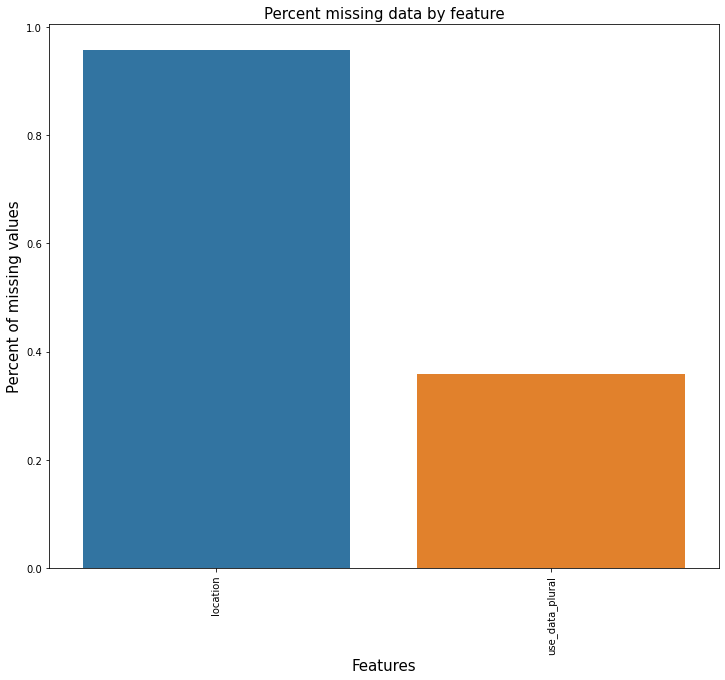

In [19]:
# Visualize the missing ratios
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

We impute them  by proceeding sequentially  through features with missing values 

NOTE: for categorical values, we have a few main methods for imputation:

-use the most common value (mode)

-use a constant value (e.g. none/na/0)



- **Missing value imputation** : We decided to replace all the missing values with the most frequent value in that column (the mode), because that is the best approximation we can get for those missing values.

In [20]:
import numpy as np
for i in range(df.shape[1]):
    df[df.columns[i]] = np.where(df[df.columns[i]].isna(), df[df.columns[i]].mode(), df[df.columns[i]])
print(df[25:35])


   use_oxford_comma heard_of_comma care_for_comma use_data_plural  \
36               No            Yes       Not much              No   
38              Yes             No          A lot              No   
39              Yes             No          A lot              No   
40              Yes            Yes           Some              No   
41               No            Yes           Some              No   
42              Yes            Yes          A lot              No   
43              Yes            Yes           Some              No   
45               No             No     Not at all              No   
46              Yes             No           Some              No   
47              Yes            Yes          A lot              No   

   considered_data_plural care_data_plural        care_grammar gender    age  \
36                     No       Not at all  Somewhat important   Male  18-29   
38                    Yes         Not much      Very important   Male  18-29   


Is there any remaining missing value ? 

In [21]:
#Check remaining missing values if any 
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio


No missing values remain.


## Features Engineering

**Transforming some numerical variables that are really categorical**



In [22]:
# We do not need to transform here because all the variables are already 
# categorical.

**Ordinal Encoding some categorical variables that may contain information in their ordering set** 

In [23]:
# Label Encoding should be applied to non-ordinal (aka nominal) variables and 
# not ordinal variables in our case. So, pandas factorize method is used instead.

# Here are the columns which use the same binary labels (and N/A). 
cols = ('use_oxford_comma','heard_of_comma','use_data_plural','considered_data_plural')

# Using pandas factorize method for ordinal data
for i in cols:
  categories = pd.Categorical(df[i], categories=['No','Yes'], ordered=True)
  
  # Factorizing the column data
  labels, unique = pd.factorize(categories, sort=True)
  df[i] = labels
  

# Here are the columns which use the same non-binary labels (not at all, not
# much, some, a lot, and N/A). 
cols_1 = ('care_for_comma','care_data_plural')

# Using pandas factorize method for ordinal data
for i in cols_1:
  categories = pd.Categorical(df[i], categories=['Not at all','Not much', 
                                    'Some','A lot'], ordered=True)
  
  # Factorizing the column data
  labels, unique = pd.factorize(categories, sort=True)
  df[i] = labels
  
# Here are the other columns which require manual transformation for the
# categorical variables.
# care_grammar  
categories = pd.Categorical(df['care_grammar'], categories=[
    'Very unimportant', 'Somewhat unimportant', 'Neutral', 
    'Somewhat important', 'Very important'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['care_grammar'] = labels

# # gender
categories = pd.Categorical(df['gender'], categories=['Female','Male'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['gender'] = labels

# # age
categories = pd.Categorical(df['age'], categories=['18-29', '30-44', 
                              '45-60', '> 60'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['age'] = labels

# # education
categories = pd.Categorical(df['education'], categories=[
    'Less than high school degree', 'High school degree', 
    'Some college or Associate degree', 'Bachelor degree', 
    'Graduate degree'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['education'] = labels

In [24]:
print(df.head())

   use_oxford_comma  heard_of_comma  care_for_comma  use_data_plural  \
0                 0               1               2                0   
1                 1               0               1                0   
5                 1               0               3                1   
6                 1               1               3                0   
7                 1               1               3                1   

   considered_data_plural  care_data_plural  care_grammar  gender  age  \
0                       0                 1             3       1    1   
1                       0                 1             1       1    1   
5                       1                 2             4       1    0   
6                       1                 2             4       1    0   
7                       0                 3             4       1    0   

   education            location  
0          3      South Atlantic  
1          4            Mountain  
5          2     

In [25]:
# transform the multi-class label (apply factorization to categorical features)
# # income
y['household_income'] = np.where(y['household_income'] =='N/A', y['household_income'].mode(), y['household_income'])
# y['household_income'].mode() = '$50,000 - $99,999'

categories = pd.Categorical(y['household_income'], categories=['$0 - $24,999', '$25,000 - $49,999',
  '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
y = labels

<ipython-input-25-8a2b53cb65ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['household_income'] = np.where(y['household_income'] =='N/A', y['household_income'].mode(), y['household_income'])


In [26]:
print(y[0:10])

[2 2 1 0 1 2 4 2 1 2]


**Skewed features**

In [27]:
from scipy.stats import skew

# All features except "location"
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
print("\nSkew in features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness.reset_index()
print(skewness.head(10))


Skew in features: 

                    index      Skew
0        use_oxford_comma -0.275299
1          heard_of_comma -0.410284
2          care_for_comma -0.347489
3         use_data_plural  1.492544
4  considered_data_plural -0.023925
5        care_data_plural  0.130977
6            care_grammar -1.655003
7                  gender  0.105409
8                     age -0.120599
9               education -0.381265


**Box Cox Transformation of (highly) skewed features**

We considered using the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. However, we deemed that the imbalance in these categorical features would actually be useful to keep given that there are only a few categories for these features to begin with, and the distribution information is valuable.



In [28]:
skewed = skewness[abs(skewness['Skew']) > 0.75]
print(skewed)
print("There are {} skewed numerical features to Box Cox transform".format(skewed.shape[0]))

             index      Skew
3  use_data_plural  1.492544
6     care_grammar -1.655003
There are 2 skewed numerical features to Box Cox transform


In [29]:
# from scipy.special import boxcox1p
# skewed_features = skewed['index']
# lam = 0.15
# for feat in skewed_features:
    # #df[feat] += 1
    # df[feat] = boxcox1p(df[feat], lam)

**Getting dummy categorical features**

In [30]:
# For binary, ordinal, and interval variables, we would not like to 
# one-hot-code all the classes. There is no need for binary 
# variables; and for ordinal and interval variables, doing so would affect
# the distance between each class [which should be the same].

# For other variables (like nominal variables e.g. location) which
# does not have natural rank ordering, we can just one-hot-code it.
df = pd.get_dummies(df)
print(df.shape)
# print(df.head())

(836, 19)


In [31]:
print(df.head())

   use_oxford_comma  heard_of_comma  care_for_comma  use_data_plural  \
0                 0               1               2                0   
1                 1               0               1                0   
5                 1               0               3                1   
6                 1               1               3                0   
7                 1               1               3                1   

   considered_data_plural  care_data_plural  care_grammar  gender  age  \
0                       0                 1             3       1    1   
1                       0                 1             1       1    1   
5                       1                 2             4       1    0   
6                       1                 2             4       1    0   
7                       0                 3             4       1    0   

   education  location_East North Central  location_East South Central  \
0          3                            0       

Spliting the train and test sets. We only include the grammar-related features, not demographic features.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 
                                                        'considered_data_plural', 'care_data_plural', 'care_grammar']], y, test_size=0.2,
                                                    random_state=0)

## Modeling

### Building an example classification model with all features
Now, it's time to build a preliminary model to predict the household income!

In [33]:
# Use Logistic Regression with Regularization
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_absolute_error
import numpy as np

In [34]:
from sklearn.metrics import mean_absolute_error
# Different weights can be assigned to samples from different classes in
# the model's loss function, inversely proportional to their frequencies.
# This would ensure that even classes with few datapoints will equally
# affect the model's loss, as compared to classes with large number 
# of datapoints. This is the purpose of using class_weight = 'balanced'.
model_all_features = LogisticRegression(max_iter=500, class_weight = 'balanced')

model_all_features.fit(X_train, y_train)
y_pred_train_af = model_all_features.predict(X_train)
y_pred_test_af = model_all_features.predict(X_test)
print("Training mean absolute error is: ", mean_absolute_error(y_train, y_pred_train_af))
print("Test mean absolute error is: ", mean_absolute_error(y_test, y_pred_test_af))

Training mean absolute error is:  1.4191616766467066
Test mean absolute error is:  1.4642857142857142


In [35]:
test_mae_ = mean_absolute_error(y_test, y_pred_test_af)
print(test_mae_)

1.4642857142857142


### Build Classification model with selected featrues
We may want to excludce some features based on correlations between features, so we will select features based on the following investigation:

#### Select features based on correlation with labels

During EDA section, we've already seen some features that correlated with labels. Let's redo this procedure as we have processed our data set.

##### Modeling with selected features

In [36]:
# Tune the threshold and find the best features set!
thre = 0.1

def chi_square(thre, X_train):
    chisqresults = []
    for i in range(0,len(X_train.columns)):
        CrosstabResult=pd.crosstab(index=y_train,columns=X_train[X_train.columns[i]])
        # print(CrosstabResult)
        # print('\n')
        ChiSqResult = chi2_contingency(CrosstabResult)
        #print(ChiSqResult[1])
        chisqresults.append((i, X_train.columns[i], ChiSqResult[1]))

    chisqresults.sort(key = lambda x: x[2])
    #print(chisqresults)
    golden_features_list = []
    for i in range(len(chisqresults)):
        # we will use a significance value of .1 to determine if a feature is strongly correlated
        if chisqresults[i][2] < thre:
            golden_features_list.append((chisqresults[i][1], chisqresults[i][2]))
    return golden_features_list

golden_features_list = chi_square(thre, X_train)
print("There is {} strongly correlated values with household_income:\n{}".format(len(golden_features_list), golden_features_list))
golden_features_index = [golden_features_list[i][0] for i in range(len(golden_features_list))]

There is 2 strongly correlated values with household_income:
[('care_data_plural', 0.05980334320234349), ('use_oxford_comma', 0.06176594471383951)]


In [37]:
model_selected_features = LogisticRegression(max_iter=500)

model_selected_features.fit(X_train[golden_features_index], y_train)
y_pred_train_ = model_selected_features.predict(X_train[golden_features_index])
y_pred_test_ = model_selected_features.predict(X_test[golden_features_index])
print("Training mean absolute error is: ", mean_absolute_error(y_train, y_pred_train_))
print("Test mean absolute error is: ", mean_absolute_error(y_test, y_pred_test_))

Training mean absolute error is:  0.8862275449101796
Test mean absolute error is:  1.0595238095238095


In [38]:
# Tune the threshold and find the best features set!
test_mae = [test_mae_]
features_num = [X_train.shape[1]]
x_plot = [0]

# We can try "0.1,2,0.1" to be inside the np.arange(). 
# The graph looks very different.
for thre in np.arange(0.0,0.1,0.01):
    golden_features_list = chi_square(thre, X_train)
    golden_features_index = [golden_features_list[i][0] for i in range(len(golden_features_list))]
    if len(golden_features_list) == 0:
        continue
    features_num.append(len(golden_features_list))
    model_selected_features.fit(X_train[golden_features_index], y_train)
    y_pred_train_ = model_selected_features.predict(X_train[golden_features_index])
    y_pred_test_ = model_selected_features.predict(X_test[golden_features_index])
    x_plot.append(thre)
    test_mae.append(mean_absolute_error(y_test, y_pred_test_))

Text(0, 0.5, 'Number of Features')

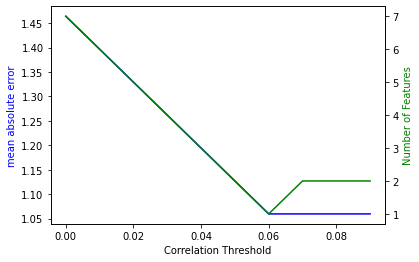

In [39]:
# Plot features vs. 
# x_plot = np.arange(0.0,0.1,0.01)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_plot, test_mae, 'b-')
ax2.plot(x_plot, features_num, 'g-')

ax1.set_xlabel('Correlation Threshold')
ax1.set_ylabel('mean absolute error', color='b')
ax2.set_ylabel('Number of Features', color='g')

## Feature Selection





### Sequential Feature Selection

Here, we investigate using feature selection methods on our dataset, but we ultimately decide to use all of the grammar-related features available as we have very few features to work with at the beginning, and discarding any of them would result in valuable information loss.

#### Step Backward Features Selection

Opposite to the step forward feature selection, step backward starts with all features and eliminates one-by-one iteratively. Step Backward Feature Selection is called greedy, because it evaluates all possible n, and then n-1 and n-2 and so on feature combinations. Therefore, it is very computationally expensive as well.

Now, we will practice the step backward features selection.

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
feature_names = ['use_oxford_comma', 'heard_of_comma', 'care_for_comma',
       'use_data_plural', 'considered_data_plural', 'care_data_plural',
       'care_grammar']

# define Ridge
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)

threshold = np.sort(importance)[-6] + 0.0000001

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train, y_train)
print(
    "Features selected by SelectFromModel:"
     f"{np.array(feature_names)[sfm.get_support()]}")

# Feature selection using sequential feature selector (both forward and backward)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=5, direction="forward"
).fit(X_train, y_train)

print(
    "Features selected by forward sequential selection: "
    f"{np.array(feature_names)[sfs_forward.get_support()]}")

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=5, direction="backward"
).fit(X_train, y_train)

print(
    "Features selected by backward sequential selection: "
    f"{np.array(feature_names)[sfs_backward.get_support()]}")

Features selected by SelectFromModel:['use_oxford_comma' 'care_for_comma' 'considered_data_plural'
 'care_data_plural' 'care_grammar']
Features selected by forward sequential selection: ['use_oxford_comma' 'care_for_comma' 'use_data_plural' 'care_data_plural'
 'care_grammar']
Features selected by backward sequential selection: ['use_oxford_comma' 'use_data_plural' 'considered_data_plural'
 'care_data_plural' 'care_grammar']


### This marks the end of our Preliminary data exploration and example model creation. What follows is the analysis and investigation into developing the best models for our dataset.

#Model Investigations#

We eventually decided to transform the problem from multiclass prediction to binary prediction because our input features were not associated enough with the output to achieve significant/interesting performance on the more difficult multiclass problem. We split the income category as evenly as possible into two categories, those being above and below $50k/year.

Additionally note that in this file, the investigation was centered around optimizng for F1 score on the minority class rather than accuracy. This was achieved by switching the ordering of labels so that the minority class (<50k) was considered the positive label. We then tried training all models with and without oversampled and found that generally, oversampling benefitted the models.

In [41]:
# Create binary classification problem with <50k and >50k

df_ = pd.read_csv(DATADIR + "comma.csv")
df_.columns = ['respondent_id', 'use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 
              'considered_data_plural', 'care_data_plural', 'care_grammar', 'gender', 'age', 'household_income', 'education', 'location']
df_ = df_.dropna(subset = ['household_income'])
y = df_[['household_income']]

y['income_binary'] = np.nan
y.loc[y['household_income'] == "$0 - $24,999", 'income_binary'] = '$0 - $49,999'
y.loc[y['household_income'] == "$25,000 - $49,999", 'income_binary'] = '$0 - $49,999'
y.loc[y['household_income'] == "$50,000 - $99,999", 'income_binary'] = '$50,000+'
y.loc[y['household_income'] == "$100,000 - $149,999", 'income_binary'] = '$50,000+'
y.loc[y['household_income'] == "$150,000+", 'income_binary'] = '$50,000+'
y = y[['income_binary']]
y_ = y
# ORDER OF CATEGORIES AFFECTS PRECISION/RECALL
# we can decide to put less frequent category as the positive label if we want as it makes the
# question more interesting and precision/recall/f1 score harder to increase
# simply by over-predicting the majority class
# categories = pd.Categorical(y['income_binary'], categories=['$0 - $49,999', '$50,000+'], ordered=True)
categories = pd.Categorical(y['income_binary'], categories=['$50,000+', '$0 - $49,999'], ordered=True)

categories
labels, unique = pd.factorize(categories, sort=True)
y = pd.DataFrame(labels)


X_train, X_test, y_train, y_test = train_test_split(df[['use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 
                                                        'considered_data_plural', 'care_data_plural', 'care_grammar']], y.to_numpy().ravel(), test_size=0.2,
                                                    random_state=0)

<ipython-input-41-20a7ffc02f6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income_binary'] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

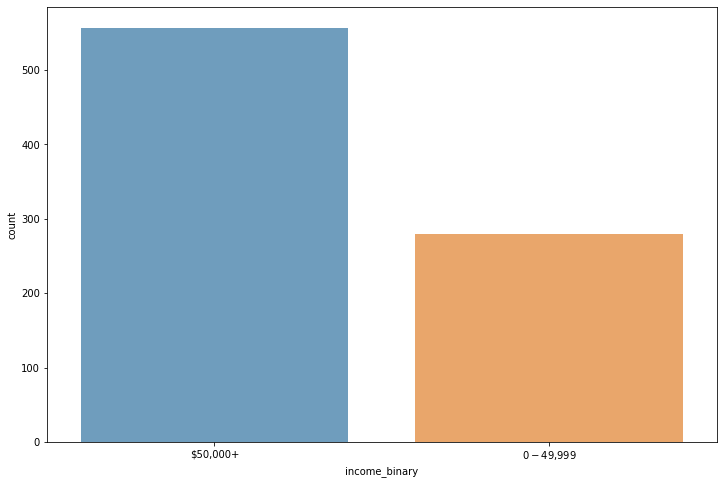

In [43]:
# Visualization of the income distribution after grouping into two categories
y_
plt.figure(figsize=(12, 8))
sns.countplot(x='income_binary', alpha=0.7, data=y_)

In [44]:
from sklearn.preprocessing import StandardScaler

# have the train data split into train and validation data
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, 
                            y_train, test_size=0.2, random_state=0)

ss = StandardScaler()
X_train_2_scaled = pd.DataFrame(ss.fit_transform(X_train_2), columns=X_train_2.columns)
X_train_2_scaled
X_val_scaled = pd.DataFrame(ss.transform(X_val), columns=X_val.columns)
X_val_scaled

# Scale full training set as well, (since we do CV training later)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_scaled

,use_oxford_comma,heard_of_comma,care_for_comma,use_data_plural,considered_data_plural,care_data_plural,care_grammar
0,0.875897,-1.217896,-0.867923,-0.486864,0.994030,-0.419204,-0.992213
1,0.875897,0.821088,1.240340,2.053960,0.994030,0.696446,0.673110
2,0.875897,0.821088,1.240340,2.053960,0.994030,0.696446,0.673110
3,-1.141687,-1.217896,0.186209,2.053960,0.994030,0.696446,0.673110
4,-1.141687,0.821088,0.186209,-0.486864,0.994030,0.696446,0.673110
...,...,...,...,...,...,...,...
163,-1.141687,-1.217896,0.186209,-0.486864,-1.006006,-1.534853,0.673110
164,-1.141687,0.821088,1.240340,-0.486864,0.994030,1.812095,0.673110
165,0.875897,-1.217896,1.240340,2.053960,0.994030,0.696446,0.673110
166,0.875897,0.821088,0.186209,-0.486864,-1.006006,1.812095,0.673110


In [45]:
# OVERSAMPLING
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# toggle this variable to use oversampled training data, 
# False to use original distribution
use_resampled = True

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# method used to print out evaluation metrics for a given model and test data
def evaluateModel(modelName, X_test_data, y_test_data):
  y_predict = modelName.predict(X_test_data)
  precision_recall = classification_report(y_test_data, y_predict)
  print(precision_recall)
  print("Test set accuracy is: ",  modelName.score(X_test_data, y_test_data))
  print("Test set F1 score is: ",  f1_score(y_test_data, y_predict))
  print("Test set precision is: ", precision_score(y_test_data, y_predict))
  print("Test set recall is: ", recall_score(y_test_data, y_predict))

  # use micro averaged versions with multi-class prediction
  # print("Test set F1 score is: ",  f1_score(y_test_data, y_predict, average='micro'))
  # print("Test set precision is: ", precision_score(y_test_data, y_predict, average='micro'))
  # print("Test set recall is: ", recall_score(y_test_data, y_predict, average='micro'))
  mat = confusion_matrix(y_predict, y_test_data)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
  plt.xlabel('predicted label')
  plt.ylabel('true label')
  # >$50k when labels' order isn't switched
  # plt.title('>$50k per year?')
  plt.title('<$50k per year?')

              precision    recall  f1-score   support

           0       0.61      0.68      0.65       104
           1       0.37      0.30      0.33        64

    accuracy                           0.54       168
   macro avg       0.49      0.49      0.49       168
weighted avg       0.52      0.54      0.52       168

Test set accuracy is:  0.5357142857142857
Test set F1 score is:  0.32758620689655166
Test set precision is:  0.36538461538461536
Test set recall is:  0.296875


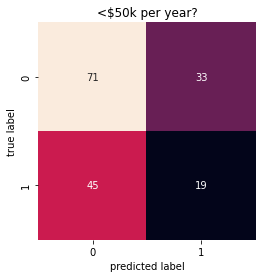

In [49]:
# Dummy Classifier, used to compare performance of later models
from sklearn.dummy import DummyClassifier

# 'stratified' strategy causes the classifier to predict on the basis of class
# distribution of the training dataset. For example, if the negative class 
# occurs about 80% of the time in the training set, then the dummy classifier 
# will output negative class with 80% probability.
dummyClf = DummyClassifier(strategy='stratified', random_state=0)
dummyClf.fit(X_train_scaled, y_train)

evaluateModel(dummyClf, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       104
           1       0.00      0.00      0.00        64

    accuracy                           0.62       168
   macro avg       0.31      0.50      0.38       168
weighted avg       0.38      0.62      0.47       168

Test set accuracy is:  0.6190476190476191
Test set F1 score is:  0.0
Test set precision is:  0.0
Test set recall is:  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

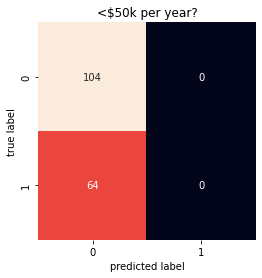

In [50]:
# 'most_frequent' strategy causes the classifier to predict the class with most
# observations in the training data every time. This type of baseline is less
# interesting due to our models simply learning to predict the majority class
# in order to compete with this model.
dummyClf = DummyClassifier(strategy='most_frequent')
dummyClf.fit(X_train_scaled, y_train)

evaluateModel(dummyClf, X_test_scaled, y_test)

The optimal number of neighbors is 13.


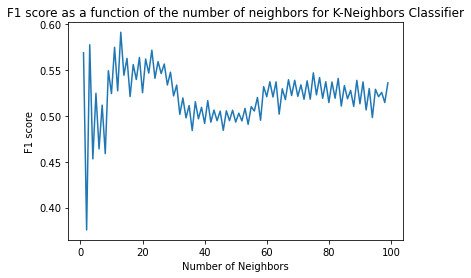

In [51]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,100))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal k-value
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    if not use_resampled:
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(k_list, cv_scores)
plt.title("F1 score as a function of the number of neighbors for K-Neighbors Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("F1 score")

# select the number of neighbors which maximizes the accuracy
best_k = k_list[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d." % best_k)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       104
           1       0.36      0.36      0.36        64

    accuracy                           0.51       168
   macro avg       0.48      0.48      0.48       168
weighted avg       0.51      0.51      0.51       168

Test set accuracy is:  0.5119047619047619
Test set F1 score is:  0.359375
Test set precision is:  0.359375
Test set recall is:  0.359375


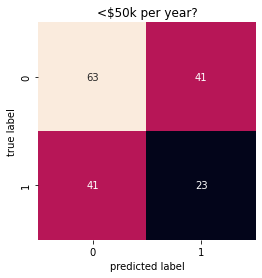

In [52]:
# Evaluate kNN

knn = KNeighborsClassifier(n_neighbors=13)
if not use_resampled:
    knn.fit(X_train_scaled, y_train)
else:
    knn.fit(X_resampled, y_resampled)

evaluateModel(knn, X_test_scaled, y_test)

The optimal max depth is 12.
Optimal F1 is 0.671259.


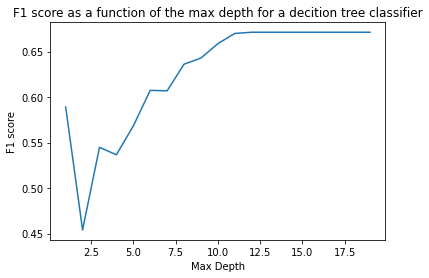

In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# creating list of max depth for decision tree
depth_list = list(range(1,20))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal max depth-value
for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth)
    if not use_resampled:
        scores = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(dt, X_resampled, y_resampled, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(depth_list, cv_scores)
plt.title("F1 score as a function of the max depth for a decition tree classifier")
plt.xlabel("Max Depth")
plt.ylabel("F1 score")

# select the number of neighbors which maximizes the accuracy
best_depth = depth_list[cv_scores.index(max(cv_scores))]
print("The optimal max depth is %d." % best_depth)
print("Optimal F1 is %f." % cv_scores[best_depth-1])

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       104
           1       0.39      0.30      0.34        64

    accuracy                           0.55       168
   macro avg       0.50      0.50      0.50       168
weighted avg       0.53      0.55      0.54       168

Test set accuracy is:  0.5535714285714286
Test set F1 score is:  0.336283185840708
Test set precision is:  0.3877551020408163
Test set recall is:  0.296875


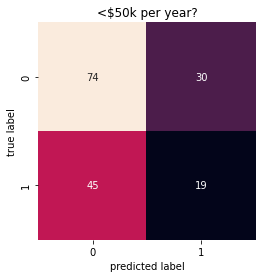

In [54]:
# Evaluate Decision Tree

dt = DecisionTreeClassifier(max_depth=12)
if not use_resampled:
    dt.fit(X_train_scaled, y_train)
else:
    dt.fit(X_resampled, y_resampled)

evaluateModel(dt, X_test_scaled, y_test)

The optimal c-val is 5.000000.
Optimal F1 is 0.513643.


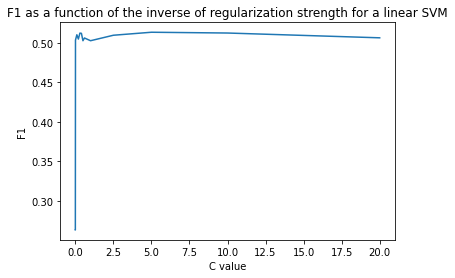

In [55]:
# SVC with the linear kernel
from sklearn.svm import SVC

c_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 2.5, 5, 10, 20]
cv_scores = []

# find the best regularization hyperparameter
for c in c_vals:
    svc = SVC(kernel='linear', C=c)
    if not use_resampled:
        scores = cross_val_score(svc, X_train_scaled, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(svc, X_resampled, y_resampled, cv=10, scoring='f1')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a linear SVM")
plt.xlabel("C value")
plt.ylabel("F1")

# select the number of neighbors which maximizes the accuracy
best_c = c_vals[cv_scores.index(max(cv_scores))]
print("The optimal c-val is %f." % best_c)
print("Optimal F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       104
           1       0.40      0.39      0.40        64

    accuracy                           0.55       168
   macro avg       0.52      0.52      0.52       168
weighted avg       0.54      0.55      0.55       168

Test set accuracy is:  0.5476190476190477
Test set F1 score is:  0.3968253968253968
Test set precision is:  0.4032258064516129
Test set recall is:  0.390625


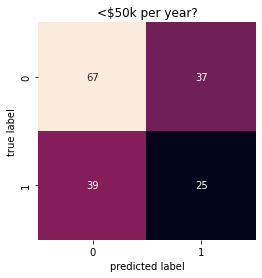

In [56]:
# Evaluate SVC with linear kernel

svc = SVC(kernel='linear', C=5)
if not use_resampled:
    svc.fit(X_train_scaled, y_train)
else:
    svc.fit(X_resampled, y_resampled)

evaluateModel(svc, X_test_scaled, y_test)

In [57]:
# SVC with the polynomial kernel
from sklearn.svm import SVC

c_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 2.5, 5, 10, 20]
degree_vals = [2,3,4,5,6]
cv_scores = []

# find the best regularization hyperparameter
for degree in degree_vals:
  cv_scores.append([])
  i = degree_vals.index(degree)
  for c in c_vals:
      svc = SVC(kernel='poly', C=c, degree=degree)
      if not use_resampled:
          scores = cross_val_score(svc, X_train_scaled, y_train, cv=10, scoring='f1')
      else:
          scores = cross_val_score(svc, X_resampled, y_resampled, cv=10, scoring='f1')
      cv_scores[i].append(scores.mean())

# find best hyperparameter values
opt_f1 = float('-inf')
opt_i = -1
opt_j = -1
for i in range(len(cv_scores)):
    for j in range(len(cv_scores[0])):
        if cv_scores[i][j] > opt_f1:
            opt_f1 = cv_scores[i][j]
            opt_i = i
            opt_j = j
            
opt_degree = degree_vals[opt_i]
opt_c = c_vals[opt_j]
print("Optimal F1: ", opt_f1)
print("Optimal degree: ", opt_degree)
print("Optimal C value: ", opt_c)

Optimal F1:  0.6860074091079292
Optimal degree:  6
Optimal C value:  0.6


Text(0, 0.5, 'F1')

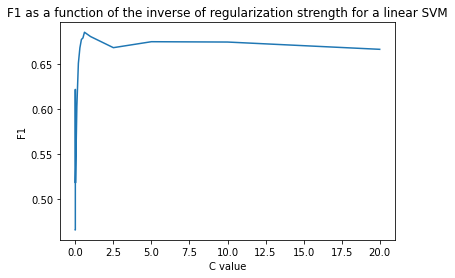

In [58]:
# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores[i])
plt.title("F1 as a function of the inverse of regularization strength for a linear SVM")
plt.xlabel("C value")
plt.ylabel("F1")

              precision    recall  f1-score   support

           0       0.66      0.43      0.52       104
           1       0.41      0.64      0.50        64

    accuracy                           0.51       168
   macro avg       0.54      0.54      0.51       168
weighted avg       0.57      0.51      0.51       168

Test set accuracy is:  0.5119047619047619
Test set F1 score is:  0.5
Test set precision is:  0.41
Test set recall is:  0.640625


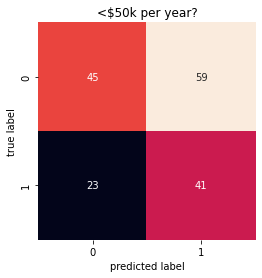

In [59]:
# Evaluate SVC with polynomial kernel

svc = SVC(kernel='poly', C=.6, degree=6)
if not use_resampled:
    svc.fit(X_train_scaled, y_train)
else:
    svc.fit(X_resampled, y_resampled)

evaluateModel(svc, X_test_scaled, y_test)

The optimal c-val is 10.000000.
Optimal F1 is 0.623446.


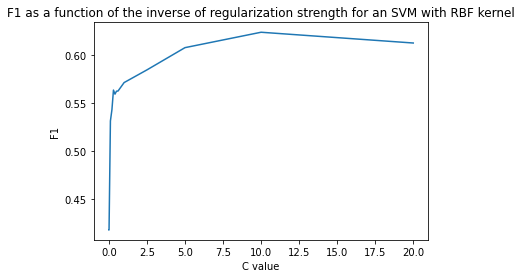

In [60]:
# SVC with the rbf kernel
from sklearn.svm import SVC

c_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 2.5, 5, 10, 20]
cv_scores = []

# find the best regularization hyperparameter
for c in c_vals:
    svc = SVC(kernel='rbf', C=c)
    if not use_resampled:
        scores = cross_val_score(svc, X_train_scaled, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(svc, X_resampled, y_resampled, cv=10, scoring='f1')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for an SVM with RBF kernel")
plt.xlabel("C value")
plt.ylabel("F1")

# select the number of neighbors which maximizes the accuracy
best_c = c_vals[cv_scores.index(max(cv_scores))]
print("The optimal c-val is %f." % best_c)
print("Optimal F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       104
           1       0.40      0.38      0.39        64

    accuracy                           0.55       168
   macro avg       0.51      0.51      0.51       168
weighted avg       0.54      0.55      0.54       168

Test set accuracy is:  0.5476190476190477
Test set F1 score is:  0.38709677419354843
Test set precision is:  0.4
Test set recall is:  0.375


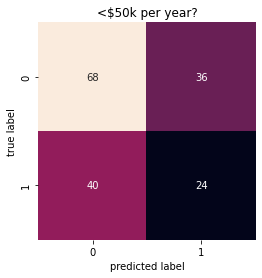

In [61]:
# Evaluate SVC with rbf kernel

svc = SVC(kernel='rbf', C=10)
if not use_resampled:
    svc.fit(X_train_scaled, y_train)
else:
    svc.fit(X_resampled, y_resampled)

evaluateModel(svc, X_test_scaled, y_test)

The optimal a-val is 0.000001.
Optimal F1 is 0.507692.


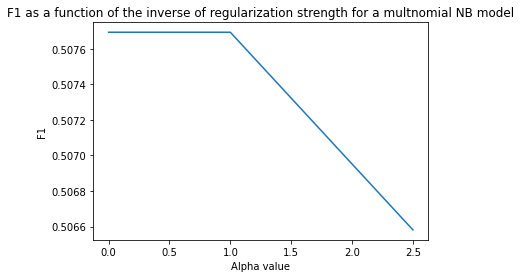

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Multinomial Naive Bayes
nb = MultinomialNB()

ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X_resampled_unscaled, y_resampled_unscaled = ros.fit_resample(X_train, y_train)

a_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.0075, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 2.5]

cv_scores = []

# find the best regularization hyperparameter
for a in a_vals:
    nb = MultinomialNB(alpha=a)
    if not use_resampled:
        scores = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(nb, X_resampled_unscaled, y_resampled_unscaled, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(a_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a multnomial NB model")
plt.xlabel("Alpha value")
plt.ylabel("F1")

# select the number of neighbors which maximizes the accuracy
best_a = a_vals[cv_scores.index(max(cv_scores))]
print("The optimal a-val is %3f." % best_a)
print("Optimal F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       104
           1       0.41      0.52      0.46        64

    accuracy                           0.54       168
   macro avg       0.53      0.53      0.53       168
weighted avg       0.56      0.54      0.54       168

Test set accuracy is:  0.5357142857142857
Test set F1 score is:  0.4583333333333333
Test set precision is:  0.4125
Test set recall is:  0.515625


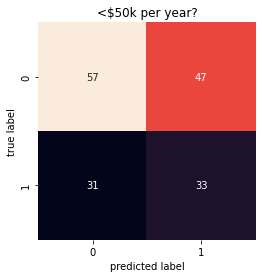

In [69]:
# Evaluate Naive Bayes

# First try Multinomial NB, although Gaussian is likely more effective
nb = MultinomialNB(alpha=1)
if not use_resampled:
    nb.fit(X_train, y_train)
else:
    nb.fit(X_resampled_unscaled, y_resampled_unscaled)

evaluateModel(nb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       104
           1       0.45      0.45      0.45        64

    accuracy                           0.58       168
   macro avg       0.56      0.56      0.56       168
weighted avg       0.58      0.58      0.58       168

Test set accuracy is:  0.5833333333333334
Test set F1 score is:  0.453125
Test set precision is:  0.453125
Test set recall is:  0.453125


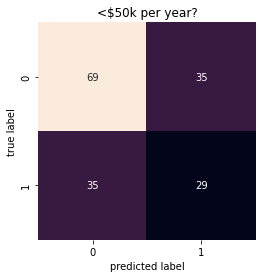

In [65]:
# Test Gaussian Naive Bayes
# (No hyperparameters to optimize)
nb = GaussianNB()
if not use_resampled:
    nb.fit(X_train, y_train)
else:
    nb.fit(X_resampled_unscaled, y_resampled_unscaled)

evaluateModel(nb, X_test, y_test)

The optimal number of trees is 21.000000.
Optimal F1 is 0.690905.


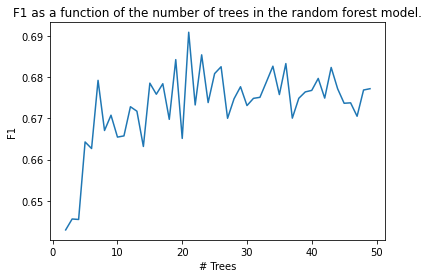

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
# find the best number of trees
num_trees = [i for i in range(2,50,1)]
num_trees
cv_scores = []

for trees in num_trees:
    clf = RandomForestClassifier(n_estimators=trees)
    if not use_resampled:
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='f1')
    else:
        scores = cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring='f1')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(num_trees, cv_scores)
plt.title("F1 as a function of the number of trees in the random forest model.")
plt.xlabel("# Trees")
plt.ylabel("F1")

# select the number of neighbors which maximizes the accuracy
best_num_trees = num_trees[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is %f." % best_num_trees)
print("Optimal F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])


# oob_acc = []
# for trees in num_trees:
#   clf = RandomForestClassifier(n_estimators=trees, oob_score=True)
#   clf.fit(X_resampled, y_resampled)
#   oob_acc.append(clf.oob_score_)

# oob_acc

In [76]:
from sklearn.model_selection import GridSearchCV
use_resampled=False
# test more hyperparemeters for our random forest
num_trees = [i for i in range(2,30,1)]
max_depth_vals = [x for x in np.arange(1, 20, 1)]
max_depth_vals.append(None)

clf = RandomForestClassifier()
param_dict = {"n_estimators": num_trees, "max_depth": max_depth_vals}
gridsearch_rf = GridSearchCV(clf, param_dict, scoring='f1', )
if use_resampled:
    gridsearch_rf.fit(X_resampled, y_resampled)
else:
    gridsearch_rf.fit(X_train_scaled, y_train)

print("Best score: ", gridsearch_rf.best_score_)
print("Best params: ", gridsearch_rf.best_params_)

Best score:  0.2866485009569387
Best params:  {'max_depth': 18, 'n_estimators': 6}


              precision    recall  f1-score   support

           0       0.69      0.55      0.61       104
           1       0.45      0.59      0.51        64

    accuracy                           0.57       168
   macro avg       0.57      0.57      0.56       168
weighted avg       0.60      0.57      0.57       168

Test set accuracy is:  0.5654761904761905
Test set F1 score is:  0.5100671140939598
Test set precision is:  0.4470588235294118
Test set recall is:  0.59375


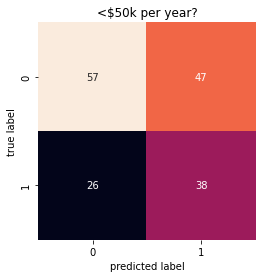

In [77]:
# Evaluate random forest
# Note: These parameters were found using the not oversampledsampled dataset and optimizing
# for performance on the minority class. Because GridSearchCV is randomized, we do not see 
# the same result from running it again. Optimal performance is then achieved training
# on the oversampled dataset
clf = RandomForestClassifier(n_estimators=11, max_depth=2, random_state=0)
use_resampled=True
if not use_resampled:
    clf.fit(X_train_scaled, y_train)
else:
    clf.fit(X_resampled, y_resampled)

evaluateModel(clf, X_test_scaled, y_test)

Examining Random Forest Feature Importance

In [79]:
importances = zip(clf.feature_names_in_, clf.feature_importances_)
i = 1
most_important = None
most_important_importances = None
print("Least to most important features:")
for feature_name, importance in sorted(importances, key=lambda x: x[1]):
  print(str(feature_name) + ": " + str(importance))
  if i == clf.n_features_in_:
    most_important = feature_name
    most_important_importances = importance
  i += 1
print("\nMost important feature: ", most_important)
print("Importance: ", most_important_importances)

Least to most important features:
use_data_plural: 0.03627409261497116
heard_of_comma: 0.04143374801557234
use_oxford_comma: 0.06107646763611634
considered_data_plural: 0.11099409045822341
care_data_plural: 0.17706323220915848
care_for_comma: 0.20763404761818116
care_grammar: 0.36552432144777713

Most important feature:  care_grammar
Importance:  0.36552432144777713


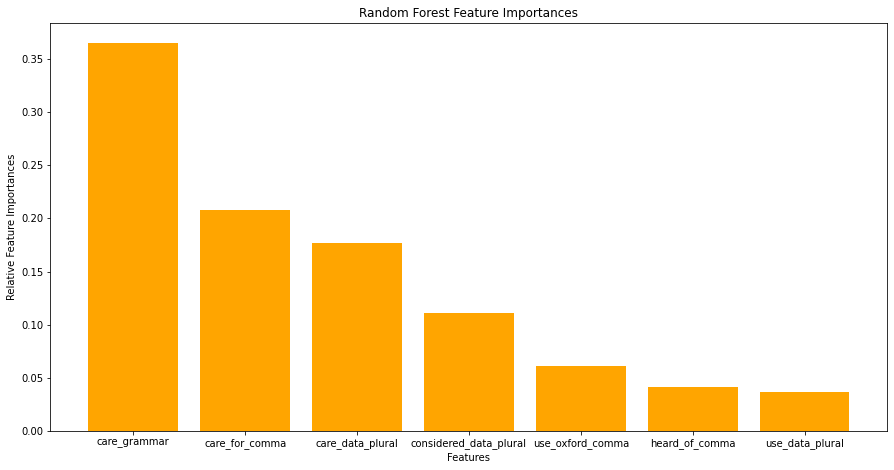

In [80]:
# Random Forest Feature Importance Visual
disp_df = pd.DataFrame(
   dict(
      features=clf.feature_names_in_,
      importances=clf.feature_importances_
   )
)
disp_df = disp_df.sort_values('importances', ascending=False)

fig = plt.figure(figsize = (15, 7.5))
 
# creating the bar plot
plt.bar('features', 'importances', data=disp_df, color='orange')

plt.xlabel("Features")
plt.ylabel("Relative Feature Importances")
plt.title("Random Forest Feature Importances")
plt.show()

Now we will visualize one of the trees that composes our random forest

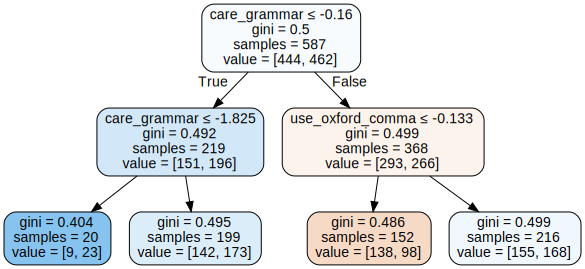

In [81]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(clf.estimators_[2], feature_names=X_resampled.columns.values, 
                           out_file=None, filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)


Data visualization for the model performances we achieved (most of these values come from models in the file where we optimized for accuracy, other than the random forest, Naive Bayes, and the dummy models).

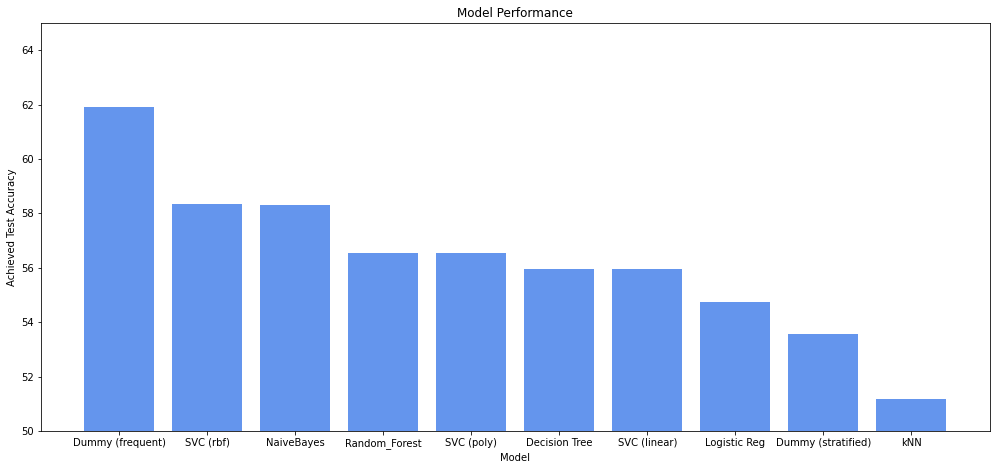

In [82]:
disp_df = pd.DataFrame(
   dict(
      model=['Logistic Reg', 'kNN', 'Decision Tree', 'Random_Forest', 'NaiveBayes', 'SVC (rbf)', 'SVC (linear)', 'SVC (poly)', 'Dummy (frequent)', 'Dummy (stratified)'],
      accuracy=[54.76, 51.19, 55.95, 56.55, 58.32, 58.33, 55.95, 56.55, 61.9, 53.57]
   )
)
disp_df = disp_df.sort_values('accuracy', ascending=False)

fig = plt.figure(figsize = (17, 7.5))
 
# creating the bar plot
plt.bar('model', 'accuracy', data=disp_df, color='cornflowerblue')
plt.ylim([50, 65])

plt.xlabel("Model")
plt.ylabel("Achieved Test Accuracy")
plt.title("Model Performance")
plt.show()